In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # corrected import statement
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

training dataset

In [ ]:
#training dataset
data = pd.read_csv('/content/train_data.txt', delimiter='\t', quoting=3, header=None, names=['ID','genre','Title','Description'], engine='python')  #modified line
data
# or try
# data = pd.read_csv('/content/train_data.txt', delimiter='\t', engine='python')
# data
# data = pd.read_csv('/content/train_data.txt', delimiter='\t', engine='python')
# data

,ID,genre,Title,Description
0,1 ::: Oscar et la dame rose (2009) ::: drama :...,NaN,NaN,NaN
1,2 ::: Cupid (1997) ::: thriller ::: A brother ...,NaN,NaN,NaN
2,"3 ::: Young, Wild and Wonderful (1980) ::: adu...",NaN,NaN,NaN
3,4 ::: The Secret Sin (1915) ::: drama ::: To h...,NaN,NaN,NaN
4,5 ::: The Unrecovered (2007) ::: drama ::: The...,NaN,NaN,NaN
...,...,...,...,...
54209,"54210 ::: ""Bonino"" (1953) ::: comedy ::: This ...",NaN,NaN,NaN
54210,54211 ::: Dead Girls Don't Cry (????) ::: horr...,NaN,NaN,NaN
54211,54212 ::: Ronald Goedemondt: Ze bestaan echt (...,NaN,NaN,NaN
54212,54213 ::: Make Your Own Bed (1944) ::: comedy ...,NaN,NaN,NaN


In [ ]:
data.describe

<bound method NDFrame.describe of                                                       ID  genre  Title  \
0      1 ::: Oscar et la dame rose (2009) ::: drama :...    NaN    NaN   
1      2 ::: Cupid (1997) ::: thriller ::: A brother ...    NaN    NaN   
2      3 ::: Young, Wild and Wonderful (1980) ::: adu...    NaN    NaN   
3      4 ::: The Secret Sin (1915) ::: drama ::: To h...    NaN    NaN   
4      5 ::: The Unrecovered (2007) ::: drama ::: The...    NaN    NaN   
...                                                  ...    ...    ...   
54209  54210 ::: "Bonino" (1953) ::: comedy ::: This ...    NaN    NaN   
54210  54211 ::: Dead Girls Don't Cry (????) ::: horr...    NaN    NaN   
54211  54212 ::: Ronald Goedemondt: Ze bestaan echt (...    NaN    NaN   
54212  54213 ::: Make Your Own Bed (1944) ::: comedy ...    NaN    NaN   
54213  54214 ::: Nature's Fury: Storm of the Century ...    NaN    NaN   

       Description  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
54209          NaN  
54210          NaN  
54211          NaN  
54212          NaN  
54213          NaN  

[54214 rows x 4 columns]>

In [ ]:
data.head

<bound method NDFrame.head of                                                       ID  genre  Title  \
0      1 ::: Oscar et la dame rose (2009) ::: drama :...    NaN    NaN   
1      2 ::: Cupid (1997) ::: thriller ::: A brother ...    NaN    NaN   
2      3 ::: Young, Wild and Wonderful (1980) ::: adu...    NaN    NaN   
3      4 ::: The Secret Sin (1915) ::: drama ::: To h...    NaN    NaN   
4      5 ::: The Unrecovered (2007) ::: drama ::: The...    NaN    NaN   
...                                                  ...    ...    ...   
54209  54210 ::: "Bonino" (1953) ::: comedy ::: This ...    NaN    NaN   
54210  54211 ::: Dead Girls Don't Cry (????) ::: horr...    NaN    NaN   
54211  54212 ::: Ronald Goedemondt: Ze bestaan echt (...    NaN    NaN   
54212  54213 ::: Make Your Own Bed (1944) ::: comedy ...    NaN    NaN   
54213  54214 ::: Nature's Fury: Storm of the Century ...    NaN    NaN   

       Description  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
54209          NaN  
54210          NaN  
54211          NaN  
54212          NaN  
54213          NaN  

[54214 rows x 4 columns]>

In [ ]:
data.dropna

<bound method DataFrame.dropna of                                                       ID  genre  Title  \
0      1 ::: Oscar et la dame rose (2009) ::: drama :...    NaN    NaN   
1      2 ::: Cupid (1997) ::: thriller ::: A brother ...    NaN    NaN   
2      3 ::: Young, Wild and Wonderful (1980) ::: adu...    NaN    NaN   
3      4 ::: The Secret Sin (1915) ::: drama ::: To h...    NaN    NaN   
4      5 ::: The Unrecovered (2007) ::: drama ::: The...    NaN    NaN   
...                                                  ...    ...    ...   
54209  54210 ::: "Bonino" (1953) ::: comedy ::: This ...    NaN    NaN   
54210  54211 ::: Dead Girls Don't Cry (????) ::: horr...    NaN    NaN   
54211  54212 ::: Ronald Goedemondt: Ze bestaan echt (...    NaN    NaN   
54212  54213 ::: Make Your Own Bed (1944) ::: comedy ...    NaN    NaN   
54213  54214 ::: Nature's Fury: Storm of the Century ...    NaN    NaN   

       Description  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
54209          NaN  
54210          NaN  
54211          NaN  
54212          NaN  
54213          NaN  

[54214 rows x 4 columns]>

In [ ]:
data.info

<bound method DataFrame.info of                                                       ID  genre  Title  \
0      1 ::: Oscar et la dame rose (2009) ::: drama :...    NaN    NaN   
1      2 ::: Cupid (1997) ::: thriller ::: A brother ...    NaN    NaN   
2      3 ::: Young, Wild and Wonderful (1980) ::: adu...    NaN    NaN   
3      4 ::: The Secret Sin (1915) ::: drama ::: To h...    NaN    NaN   
4      5 ::: The Unrecovered (2007) ::: drama ::: The...    NaN    NaN   
...                                                  ...    ...    ...   
54209  54210 ::: "Bonino" (1953) ::: comedy ::: This ...    NaN    NaN   
54210  54211 ::: Dead Girls Don't Cry (????) ::: horr...    NaN    NaN   
54211  54212 ::: Ronald Goedemondt: Ze bestaan echt (...    NaN    NaN   
54212  54213 ::: Make Your Own Bed (1944) ::: comedy ...    NaN    NaN   
54213  54214 ::: Nature's Fury: Storm of the Century ...    NaN    NaN   

       Description  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
54209          NaN  
54210          NaN  
54211          NaN  
54212          NaN  
54213          NaN  

[54214 rows x 4 columns]>

In [ ]:
data.isnull

<bound method DataFrame.isnull of                                                       ID  genre  Title  \
0      1 ::: Oscar et la dame rose (2009) ::: drama :...    NaN    NaN   
1      2 ::: Cupid (1997) ::: thriller ::: A brother ...    NaN    NaN   
2      3 ::: Young, Wild and Wonderful (1980) ::: adu...    NaN    NaN   
3      4 ::: The Secret Sin (1915) ::: drama ::: To h...    NaN    NaN   
4      5 ::: The Unrecovered (2007) ::: drama ::: The...    NaN    NaN   
...                                                  ...    ...    ...   
54209  54210 ::: "Bonino" (1953) ::: comedy ::: This ...    NaN    NaN   
54210  54211 ::: Dead Girls Don't Cry (????) ::: horr...    NaN    NaN   
54211  54212 ::: Ronald Goedemondt: Ze bestaan echt (...    NaN    NaN   
54212  54213 ::: Make Your Own Bed (1944) ::: comedy ...    NaN    NaN   
54213  54214 ::: Nature's Fury: Storm of the Century ...    NaN    NaN   

       Description  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
54209          NaN  
54210          NaN  
54211          NaN  
54212          NaN  
54213          NaN  

[54214 rows x 4 columns]>

In [ ]:
data.sum

<bound method DataFrame.sum of                                                       ID  genre  Title  \
0      1 ::: Oscar et la dame rose (2009) ::: drama :...    NaN    NaN   
1      2 ::: Cupid (1997) ::: thriller ::: A brother ...    NaN    NaN   
2      3 ::: Young, Wild and Wonderful (1980) ::: adu...    NaN    NaN   
3      4 ::: The Secret Sin (1915) ::: drama ::: To h...    NaN    NaN   
4      5 ::: The Unrecovered (2007) ::: drama ::: The...    NaN    NaN   
...                                                  ...    ...    ...   
54209  54210 ::: "Bonino" (1953) ::: comedy ::: This ...    NaN    NaN   
54210  54211 ::: Dead Girls Don't Cry (????) ::: horr...    NaN    NaN   
54211  54212 ::: Ronald Goedemondt: Ze bestaan echt (...    NaN    NaN   
54212  54213 ::: Make Your Own Bed (1944) ::: comedy ...    NaN    NaN   
54213  54214 ::: Nature's Fury: Storm of the Century ...    NaN    NaN   

       Description  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
54209          NaN  
54210          NaN  
54211          NaN  
54212          NaN  
54213          NaN  

[54214 rows x 4 columns]>

In [ ]:
test_path = '/content/test_data_solution.txt' # Changed the file path to include the folder "content"
test_data = pd.read_csv(test_path, sep=':::', names=['Id', 'Title', 'Description'], engine='python')
test_data.head()

,Id,Title,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [ ]:
test_data.describe

<bound method NDFrame.describe of                                      Id          Title  \
1                 Edgar's Lunch (1998)       thriller    
2             La guerra de papá (1977)         comedy    
3          Off the Beaten Track (2010)    documentary    
4               Meu Amigo Hindu (2015)          drama    
5                    Er nu zhai (1955)          drama    
...                                 ...            ...   
54196   "Tales of Light & Dark" (2013)         horror    
54197      Der letzte Mohikaner (1965)        western    
54198              Oliver Twink (2007)          adult    
54199                Slipstream (1973)          drama    
54200        Curitiba Zero Grau (2010)          drama    

                                             Description  
1       L.R. Brane loves his life - his car, his apar...  
2       Spain, March 1964: Quico is a very naughty ch...  
3       One year in the life of Albin and his family ...  
4       His father has died, he hasn't spoken with hi...  
5       Before he was known internationally as a mart...  
...                                                  ...  
54196   Covering multiple genres, Tales of Light & Da...  
54197   As Alice and Cora Munro attempt to find their...  
54198   A movie 169 years in the making. Oliver Twist...  
54199   Popular, but mysterious rock D.J Mike Mallard...  
54200   Curitiba is a city in movement, with rhythms ...  

[54200 rows x 3 columns]>

In [ ]:
test_data.dropna

<bound method DataFrame.dropna of                                      Id          Title  \
1                 Edgar's Lunch (1998)       thriller    
2             La guerra de papá (1977)         comedy    
3          Off the Beaten Track (2010)    documentary    
4               Meu Amigo Hindu (2015)          drama    
5                    Er nu zhai (1955)          drama    
...                                 ...            ...   
54196   "Tales of Light & Dark" (2013)         horror    
54197      Der letzte Mohikaner (1965)        western    
54198              Oliver Twink (2007)          adult    
54199                Slipstream (1973)          drama    
54200        Curitiba Zero Grau (2010)          drama    

                                             Description  
1       L.R. Brane loves his life - his car, his apar...  
2       Spain, March 1964: Quico is a very naughty ch...  
3       One year in the life of Albin and his family ...  
4       His father has died, he hasn't spoken with hi...  
5       Before he was known internationally as a mart...  
...                                                  ...  
54196   Covering multiple genres, Tales of Light & Da...  
54197   As Alice and Cora Munro attempt to find their...  
54198   A movie 169 years in the making. Oliver Twist...  
54199   Popular, but mysterious rock D.J Mike Mallard...  
54200   Curitiba is a city in movement, with rhythms ...  

[54200 rows x 3 columns]>

logistic regression

In [ ]:
# Assuming 'data' is your DataFrame with 'text' and 'genre' columns
# If your genre column has a different name, replace 'genre' accordingly
# 1. Prepare the data
X = data['Title'].astype(str) + ' ' + data['Description'].astype(str)  # Combine title and description for better context
y = data['genre']

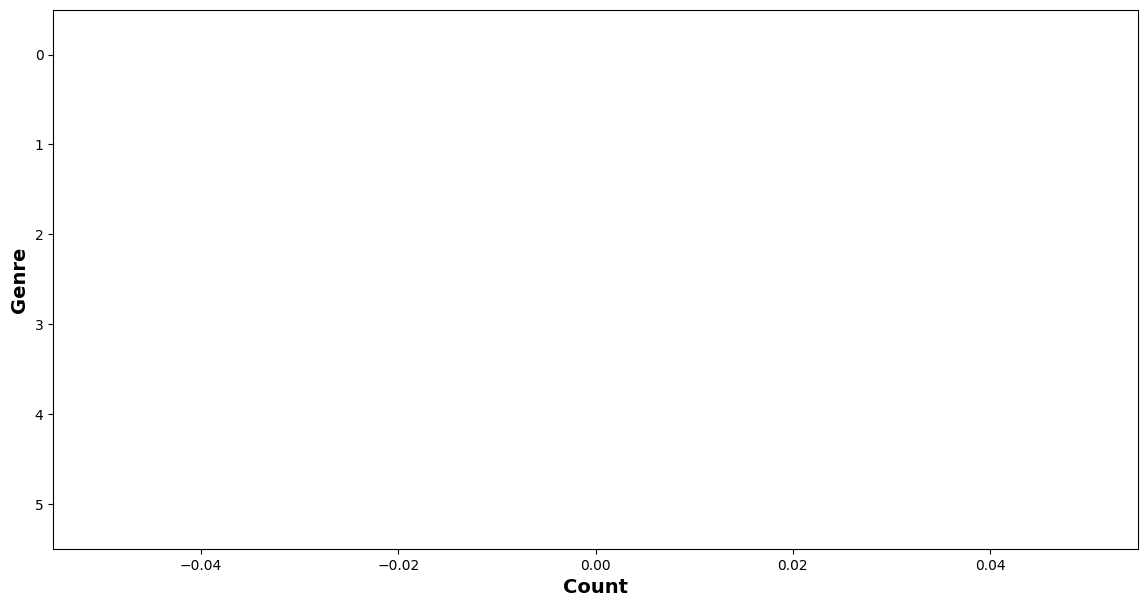

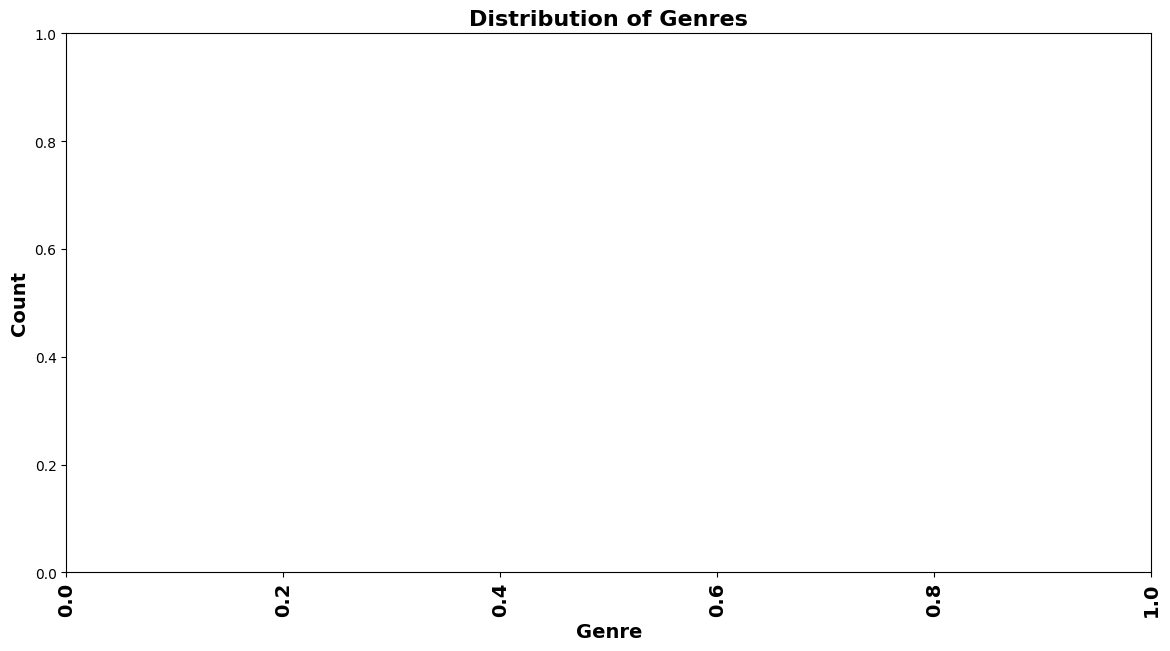

In [ ]:
# Plot the distribution of genres in the training data
plt.figure(figsize=(14, 7))
sns.countplot(data=data, y='genre', order=data['genre'].value_counts().index, palette='viridis') # Changed train_data.txt to data and 'Genre' to 'genre'
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Genre', fontsize=14, fontweight='bold')

# Plot the distribution of genres using a bar plot
plt.figure(figsize=(14, 7))
counts = data['genre'].value_counts() # Changed train_data.txt to data and 'Genre' to 'genre'
sns.barplot(x=counts.index, y=counts, palette='viridis')
plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

In [ ]:
# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

term frequency-inverse document frequency(tf-IDF)**bold text**

In [ ]:
# 3. Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vec = vectorizer.fit_transform(data)
X_test_vec = vectorizer.transform(data)

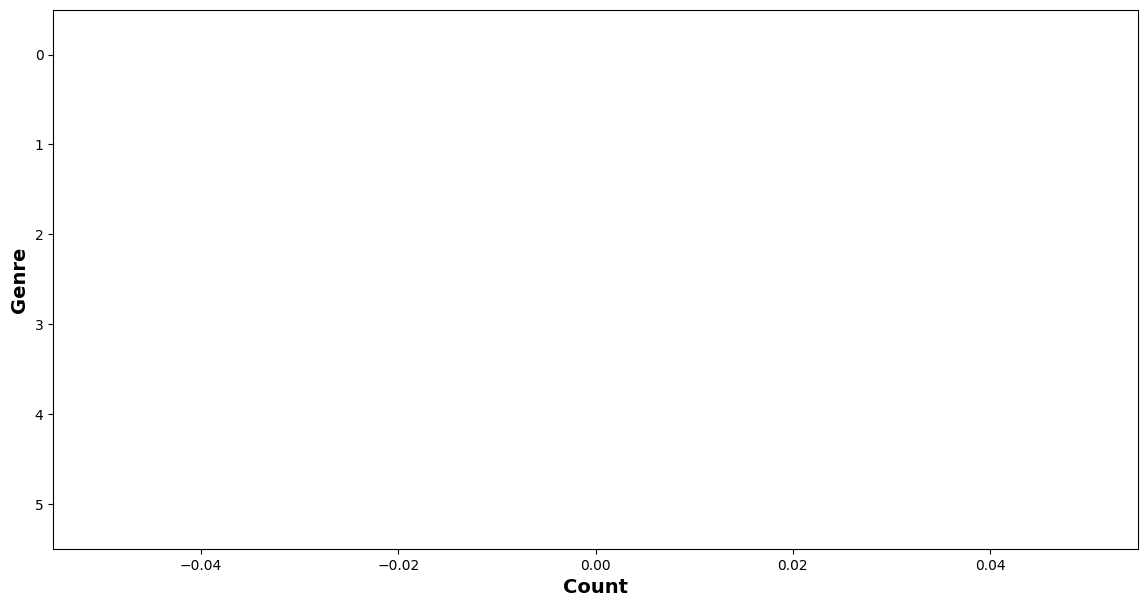

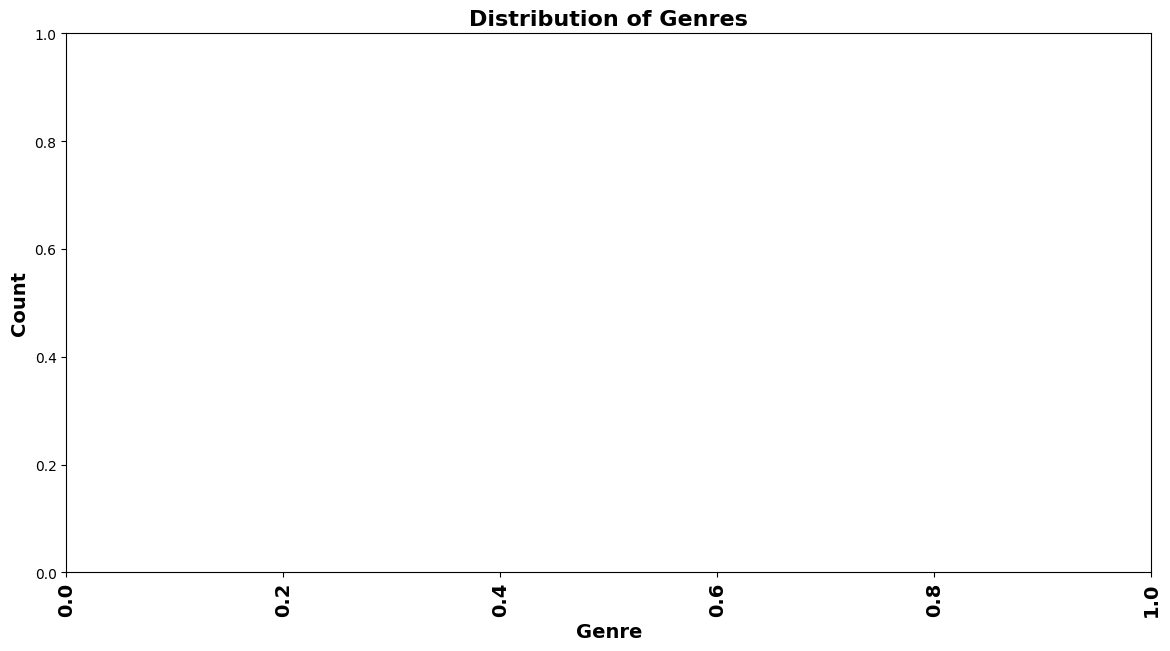

In [ ]:
# Plot the distribution of genres in the training data
plt.figure(figsize=(14, 7))
sns.countplot(data=data, y='genre', order=data['genre'].value_counts().index, palette='viridis')  # Changed 'Genre' to 'genre'
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Genre', fontsize=14, fontweight='bold')

# Plot the distribution of genres using a bar plot
plt.figure(figsize=(14, 7))
counts = data['genre'].value_counts()  # Changed 'Genre' to 'genre' and train_data.txt to data
sns.barplot(x=counts.index, y=counts, palette='viridis')
plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')
from nltk.stem import LancasterStemmer # Import the LancasterStemmer
from nltk.corpus import stopwords
import string # Import the string module


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
!pip install langdetect
from langdetect import detect
text = "but especially his girlfriend, Vespa.."
language = detect(text)
print(f"Language: {language}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=864569c69b9f0874c8a41b1d9a366c9636f9820c8a3402d4b9ac72e911ae367e
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect
Language: en


In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')
from nltk.stem import LancasterStemmer # Import the LancasterStemmer
from nltk.corpus import stopwords
import string # Import the string module
!pip install langdetect
from langdetect import detect


# Initialize the stemmer and stop words
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

# Define the clean_text function
def clean_text(text):
    # Check if the text is a string, otherwise handle it appropriately
    if isinstance(text, str):
        text = text.lower()  # Lowercase all characters
        text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
        text = re.sub(r'http\S+', '', text)  # Remove URLs
        text = re.sub(r'pic.\S+', '', text)
        # Modified regex to preserve words and apostrophes
        text = re.sub(r"[^a-zA-Z']", ' ', text)
        # Removed the line that was removing single characters and short words
        text = "".join([i for i in text if i not in string.punctuation])
        # Fixed: Pass the 'text' variable to word_tokenize
        words = nltk.word_tokenize(text)
        stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
        # Modified to keep words with length > 1 to avoid removing important words
        text = " ".join([i for i in words if i not in stopwords and len(i) > 1])
        text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
        return text
    # If text is not a string (e.g., NaN), return an empty string to avoid errors
    else:
        return ''

# Apply the clean_text function to the 'Description' column in the training and test data
data['Text_cleaning'] = data['Description'].apply(clean_text)
data['Text_cleaning'] = data['Description'].apply(clean_text)

# Assuming 'data' is your DataFrame and 'Text_cleaning' is the column containing text
# Apply detect to each text, handling potential errors
data['language'] = data['Text_cleaning'].apply(lambda x: detect(x) if len(x) > 5 else 'unknown')
filtered_data = data[data['language'] == 'en'] # Filter the data to include only entries with language 'en' (English)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


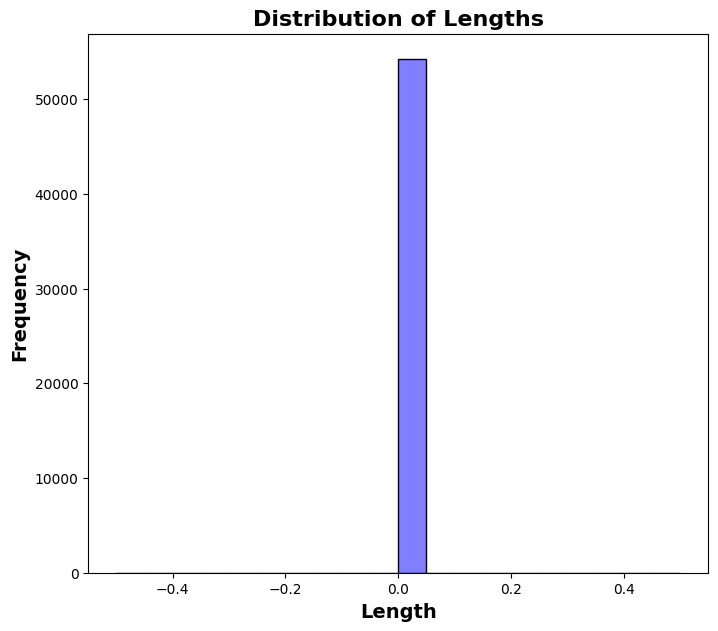

In [ ]:
data['length_Text_cleaning'] = data['Text_cleaning'].apply(len)
# Visualize the distribution of text lengths
plt.figure(figsize=(8, 7))
sns.histplot(data=data, x='length_Text_cleaning', bins=20, kde=True, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.show()

text summarisation

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load('en_core_web_sm')
#sample text
text = """ L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes."""
#text preprocessing
doc = nlp(text)
tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]

#calculate word frequencies
word_freq = {}
for word in tokens:
   if word not in word_freq:
      word_freq[word] = 1
   else: #Fixed indentation for else to align with if
      word_freq[word] += 1

In [ ]:
import numpy as np

def train_test_split(X, y, test_size=0.2, random_state=42):
    """Splits data into random train and test subsets.

    Args:
        X (array-like): Features or input data.
        y (array-like): Target variable or labels.
        test_size (float, optional): Proportion of the dataset to include in the test split. Defaults to 0.2.
        random_state (int, optional): Controls the shuffling applied to the data before applying the split.
                                     Pass an int for reproducible output across multiple function calls. Defaults to 42.

    Returns:
        tuple: X_train, X_test, y_train, y_test
    """
    # Set random seed for reproducibility
    np.random.seed(random_state)

    # Get the total number of samples
    num_samples = len(X)

    # Calculate the number of test samples
    num_test_samples = int(test_size * num_samples)

    # Generate random indices for test samples
    test_indices = np.random.choice(num_samples, size=num_test_samples, replace=False)

    # Get train indices by excluding test indices
    train_indices = np.setdiff1d(np.arange(num_samples), test_indices)

    # Split the data
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]

    return X_train, X_test, y_train, y_test

In [ ]:
import numpy as np

def train_val_split(X, y, test_size=0.2, random_state=42):
    """Splits data into random train and validation subsets."""
    # ... (rest of your function's code) ...
    return X_train, X_val, y_train, y_val  # Renamed outputs


X_train, X_val, y_train, y_val = train_val_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 3. Create a CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer  # Import if not already imported
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(data['Title'].astype(str) + ' ' + data['Description'].astype(str)).toarray()
y = data['genre']

In [ ]:
# Before vectorizing, drop rows with NaN in 'genre'
data = data.dropna(subset=['genre'])  # Drop rows with NaN in the 'genre' column

In [ ]:
test_data.to_csv('/content/test_data MOVIE GENRE.txt', index=False)

test_data

,Id,Title,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
...,...,...,...
54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
54198,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."
